<a href="https://colab.research.google.com/github/Rohithtechis/World_Happiness_report/blob/main/World_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [73]:
x = 2015
dff = []
while True:
    globals()[f'df{x}'] = pd.read_csv(f'/content/{x}.csv')
    dff.append(globals()[f'df{x}'])
    x += 1
    if x == 2020:
        break

In [74]:
df2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [75]:
df2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [76]:
df2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [77]:
df2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [78]:
df2019.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [79]:
df2015.rename(columns = {'Economy (GDP per Capita)' : 'GDP','Health (Life Expectancy)' : 'Life','Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [80]:
df2016.rename(columns = {'Economy (GDP per Capita)' : 'GDP','Health (Life Expectancy)' : 'Life','Trust (Government Corruption)' : 'Trust'}, inplace = True)

In [81]:
df2017.rename(columns = {'Happiness.Rank' : 'Happiness Rank','Happiness.Score' : 'Happiness Score','Economy..GDP.per.Capita.' : 'GDP',
                        'Health..Life.Expectancy.' : 'Life','Dystopia.Residual' : 'Dystopia Residual','Trust..Government.Corruption.' : 'Trust'}, inplace = True)

In [82]:
df2018.rename(columns = {'Overall rank' : 'Happiness Rank','Score' : 'Happiness Score','Country or region' : 'Country','Social support' : 'Family',
                        'Freedom to make life choices' : 'Freedom','GDP per capita' : 'GDP','Healthy life expectancy' : 'Life',
                         'Perceptions of corruption' : 'Trust'}, inplace = True)

In [83]:
df2019.rename(columns = {'Overall rank' : 'Happiness Rank','Score' : 'Happiness Score','Country or region' : 'Country',
                        'Social support' : 'Family','Freedom to make life choices' : 'Freedom','GDP per capita' : 'GDP',
                        'Healthy life expectancy' : 'Life','Perceptions of corruption' : 'Trust'}, inplace = True)

In [84]:
for i, df in enumerate(dff, 2015):
    df['Year'] = i

In [85]:
for df in dff:
    if not ('Region') in df:
        df['Region'] = None
        temp = df.set_index('Country').Region.fillna(df2015.set_index('Country').Region).reset_index()
        df.fillna(temp, inplace = True)

In [86]:
fuldf = pd.concat(dff)

In [87]:
fuldf.drop(labels=['Upper Confidence Interval'],axis=1,inplace=True)
fuldf.drop(labels=['Dystopia Residual'],axis=1,inplace=True)
fuldf.drop(labels=['Whisker.high'],axis=1,inplace=True)
fuldf.drop(labels=['Whisker.low'],axis=1,inplace=True)
fuldf.drop(labels=['Standard Error'],axis=1,inplace=True)  
fuldf.drop(labels=['Lower Confidence Interval'],axis=1,inplace=True)

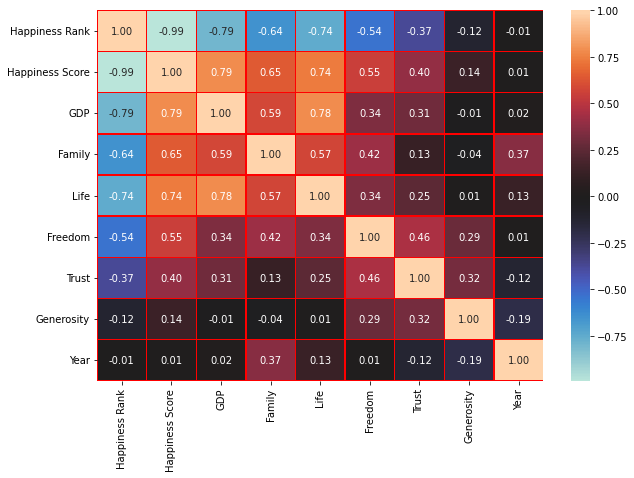

In [88]:
fig = plt.figure(figsize=(10,15))

ax1 = plt.subplot(2,1,1)

sns.heatmap(fuldf.corr(), annot=True,linewidths=0.5, fmt=".2f",linecolor="red", center= 0,ax=ax1) 

In [89]:
fuldf.head()

,Country,Region,Happiness Rank,Happiness Score,GDP,Family,Life,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [90]:
fuldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          782 non-null    object 
 1   Region           763 non-null    object 
 2   Happiness Rank   782 non-null    int64  
 3   Happiness Score  782 non-null    float64
 4   GDP              782 non-null    float64
 5   Family           782 non-null    float64
 6   Life             782 non-null    float64
 7   Freedom          782 non-null    float64
 8   Trust            781 non-null    float64
 9   Generosity       782 non-null    float64
 10  Year             782 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 73.3+ KB


In [91]:
fuldf.isna().sum()

Country             0
Region             19
Happiness Rank      0
Happiness Score     0
GDP                 0
Family              0
Life                0
Freedom             0
Trust               1
Generosity          0
Year                0
dtype: int64

In [92]:
fuldf = fuldf.rename(columns = {'Happiness Score': 'Score' })
fuldf['Trust'].fillna(value=fuldf['Trust'].mean(),inplace=True)

In [93]:
fuldf.head()

,Country,Region,Happiness Rank,Score,GDP,Family,Life,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [94]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
fuldf['Country']=en.fit_transform(fuldf['Country'])
fuldf['Region']=en.fit_transform(fuldf['Region'])

In [95]:
X = fuldf.drop(['Score','Happiness Rank'],axis=1)
y = fuldf['Score']

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [98]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

In [99]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
print("Accuracy: ", lm.score(X_test,y_test))
print('Mean Absolute Error of linear regression:',mean_absolute_error(y_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(y_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(y_pred, y_test))

Accuracy:  0.7686042306016858
Mean Absolute Error of linear regression: 0.43754719673112025
Mean Square Error of linear regression: 0.30800684174451487
R_Squared Score of linear regression: 0.6729901657724571


In [100]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(lm,X,y,cv=5))

[0.68629658 0.65143916 0.7805576  0.78633054 0.76852637]


In [101]:
accuracies = cross_val_score(estimator = lm,X = X_train,y = y_train,cv=10)
print("Accuracy(mean):%",accuracies.mean()*100)

Accuracy(mean):% 75.27286547479274


In [102]:
from sklearn import ensemble
rf = ensemble.RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [103]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
print("Accuracy: ", rf.score(X_test,y_test))
print('Mean Absolute Error of linear regression:',mean_absolute_error(y_pred, y_test))
print('Mean Square Error of linear regression:', mean_squared_error(y_pred, y_test))
print('R_Squared Score of linear regression:', r2_score(y_pred, y_test))

Accuracy:  0.8283188708095707
Mean Absolute Error of linear regression: 0.3463096830608255
Mean Square Error of linear regression: 0.22852173367980952
R_Squared Score of linear regression: 0.7706793816025845


In [104]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(rf,X,y,cv=5))


[0.83139442 0.80099314 0.88268652 0.9084451  0.76022319]


In [105]:
accuracies = cross_val_score(estimator = rf,X = X_train,y = y_train,cv=10)
print("Accuracy(mean):%",accuracies.mean()*100)

Accuracy(mean):% 82.90763449582965
